In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

### Importing data

In [27]:
df = pd.read_csv('Classified Data',index_col=0)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [28]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Standardizing to the same scale

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [32]:
scaled = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [33]:
scaled

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

### Recreating a standardized data frame

In [34]:
df_feat = pd.DataFrame(scaled,columns=df.columns[:-1])
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


### Train test split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### K Nearest Neighbors Machine Learn

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=1)

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
pred = knn.predict(X_test)

### Creating a classification report and a confusion matrix

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [43]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


### Analising another k value 

In [44]:
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.sum(pred_i != y_test))

Text(0, 0.5, 'Error')

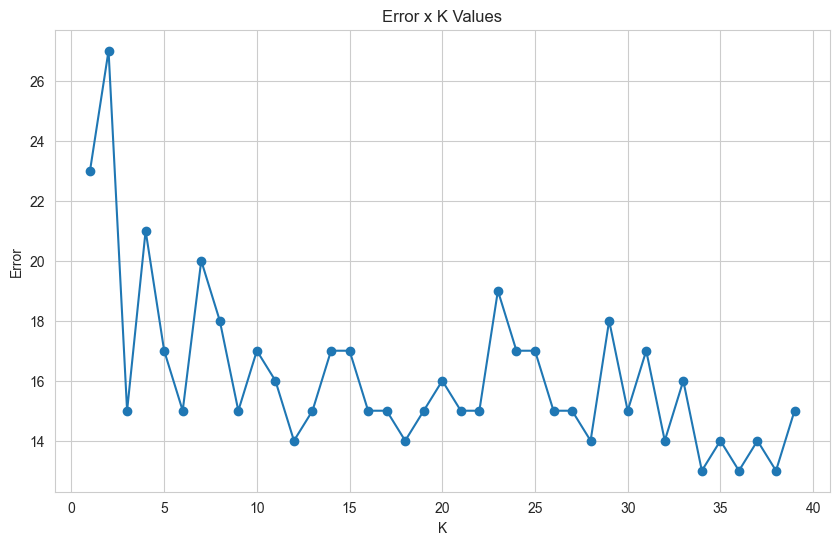

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,marker='o')
plt.title('Error x K Values')
plt.xlabel('K')
plt.ylabel('Error')

### Selecting different k values

In [46]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       159
           1       0.97      0.93      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



[[155   4]
 [ 10 131]]


In [47]:
knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



[[153   6]
 [  7 134]]
